# Examen Módulo 1 - Optimización. <font color=blue>Tipo de examen 1</font>.
Lea cuidadosamente las siguientes **indicaciones** antes de comenzar el examen:
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *E1ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *E1ZapataCristian*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo.
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

## Primer punto. Optimización de funciones escalares usando `sympy` (30 puntos).

**Enunciado.** Un granjero tiene $2400$ m de cerca y desea cercar un campo rectangular de longitud $x$ y altura $y$ que limita con un río recto. No necesita cercar a lo largo del río. ¿Cuáles son las dimensiones
del campo que tiene el área más grande?

Ver la siguiente figura como ayuda

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

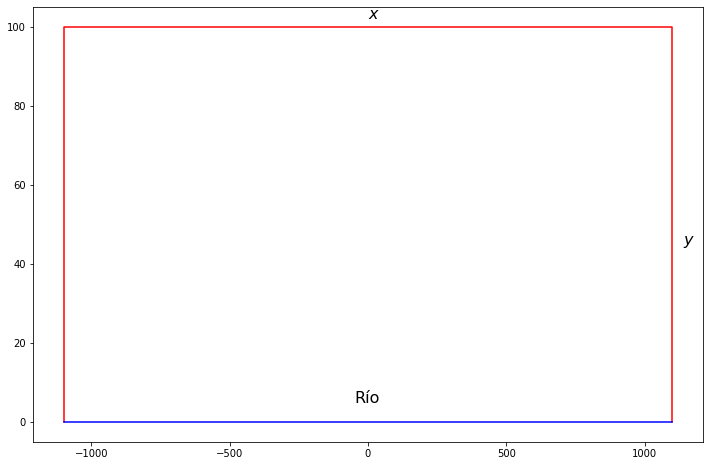

In [2]:
xr = [-1100, -1100, 1100, 1100]
yr = [0, 100, 100, 0]

xx = [-1100, 1100]
yx = [0, 0]

xy = [1100, 1100]
yy = [0, 100]

plt.figure(figsize = (12, 8))
plt.plot(xr, yr, 'r')
plt.plot(xx, yx, 'b')
#plt.plot(xy, yy, 'g')
plt.text(-50, 5, 'Río', fontsize = 16)
plt.text(1140, 45, '$y$', fontsize = 16, color = 'k')
plt.text(0, 102, '$x$', fontsize = 16, color = 'k')
plt.show()

**Punto 1 (10 puntos).** Encuentre el área del rectángulo en función de la variable $x$, $A_R(x)$. También provea el dominio de la función para que tenga sentido (Recuerde que las áreas no pueden ser negativas).

Realice este punto usando fórmulas en LaTeX, en celdas Markdown.

**Solución punto 1.**

**Punto 2 (15 puntos).** Usando `sympy` maximice la función $A_R(x)$ en su dominio.

**Solución punto 2.**

In [3]:
import sympy as sym
sym.init_printing(use_latex = 'mathjax')

In [4]:
sym.var('x',real = True)

x

In [5]:
def A(x):
    return ((2400*x)-(x**2))/2
def P(x):
    return (2400-x)/2

## Usamos P(x) como el valor de 'y' y lo sustituimos en la formula de Área $A_R$(x) = xy

In [6]:
df = sym.diff(A(x),x)
df

1200 - x

In [7]:
xc = sym.solve(df,x)
xc

[1200]

In [8]:
A(1200)

720000.0

## <font color=red> El área será de 720,000 metros cuadrados.
    

In [9]:
P(1200)

600.0

## <font color=blue> Ya que tenemos el valor de nuestra derivada, sustituimos en P(x) que es igual al valor de 'y' y obteneos que y = 600

**Punto 3 (5 puntos).** ¿Cuáles son las dimensiones $x$ y $y$ del rectángulo resultante?

**Solución punto 3.**

## <font color=blue> Las dimensiones del triangulo resultante es de $x$ = 1200 y $y$ = 600
    

## Segundo punto. Programación lineal (35 puntos).

**Enunciado.** Una compañía aérea dispone de dos tipos de aviones $A_1$, y $A_2$., para cubrir un determinado
trayecto. El avión $A_1$, debe hacer el trayecto más veces que el avión $A_2$ pero no puede sobrepasar $120$
viajes. Entre los dos aviones deben hacer más de $60$ vuelos, pero menos de $200$. En cada viaje del avión $A_1$ la empresa gana $\$30000$ y $\$20000$ por cada viaje del avión $A_2$. ¿Cuántos viajes debe hacer cada avión para obtener el máximo de ganancias?

*Definición de variables*: Sea $x_1$ la cantidad de viajes del avión $A_1$ y $x_2$ la cantidad de e viajes del avión $A_2$.

**Punto 1 (20 puntos).** Escriba la función a minimizar junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en LaTeX, en celdas Markdown). Además escriba el problema en la forma 
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}

proporcionando $\boldsymbol{c}$, $\boldsymbol{A}$ y $\boldsymbol{b}$ ($\boldsymbol{A}_{eq}$ y $\boldsymbol{b}_{eq}$, de ser necesario) como arreglos de `NumPy` (no es necesario escribir en LaTeX el problema en la forma indicada, solo proporcionar las matrices como arreglos de `NumPy`). Adicionalmente, si se requiere, recuerde escribir las cotas (límites superiores e inferiores) para cada una de las variables.

**Solución punto 1.**

In [10]:
import scipy.optimize as opt
import numpy as np

In [11]:
# Escriba acá las matrices como arreglos de Numpy
c = -np.array([30000,20000])

A = np.array([[-1,1],
              [1,0],
              [-1,-1],
              [1,1]])
b = np.array([0,120,-60,200])

**Punto 2 (15 puntos).** Resuelva el problema utilizando la función `linprog`. ¿Cuántos será la ganancia total?, ¿Cuántos viajes debe hacer cada avión?

In [12]:
sol = opt.linprog(c,A,b)

In [13]:
sol

     con: array([], dtype=float64)
     fun: -5199999.987367104
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([3.99999999e+01, 2.91360649e-07, 1.40000000e+02, 4.85964506e-07])
  status: 0
 success: True
       x: array([119.99999971,  79.99999981])

 ## <font color=red>La ganancia máxima que podría obtener la aerolinea es de $\$5,200,000$, haciendo $120$ vuelos con el avion $ A_1 $ y $80$ vuelos con el avion $  A_2$.

### \begin{equation}
\begin{array}{1}
\text{max} & \quad (30000A_1 + 20000 A_2)\\
\text{s. a. } & -A_1 + A_2 < 0 \\
              & A_1 \leq 120 \\
              & -A_1 - A_2 \leq -60 \\
              & A_1 + A_2 \leq 200
\end{array}
\end{equation}

<font color=red> $\max\quad (30000A_1 + 20000 A_2)$

Restricciones de Igualdad

$ -A_1 + A_2 < 0$

$  A_1 \leq 120$

$ -A_1 - A_2 \leq -60$

$  A_1 + A_2 \leq 200$

## Tercer punto. Ajuste de curvas (35 puntos).

**Enunciado**. El archivo `renewable_energy.csv` contiene información histórica anual de México relativa al consumo de energías de fuentes renovables en porcentaje desde el año 1990 hasta el año 2015. La primer columna corresponde al consecutivo, la segunda a los años, y la tercera al consumo.

Tomado de: https://data.worldbank.org/indicator/EG.FEC.RNEW.ZS?view=chart

**Punto 1 (10 puntos).** Importar los datos en un DataFrame de pandas.

**Solución punto 1.**

In [14]:
import pandas as pd

In [15]:
archivo = 'renewable_energy.csv'
data = pd.read_csv(archivo)
data

,Consecutivo,Year,% of total final energy consumption
0,1,1990,14.413302
1,2,1991,13.195512
2,3,1992,13.427092
3,4,1993,13.303969
4,5,1994,11.863103
5,6,1995,13.261833
6,7,1996,13.064724
7,8,1997,12.699777
8,9,1998,12.238453
9,10,1999,12.748461


**Punto 2 (15 puntos).** Usando el consecutivo como variable independiente $x$ y el consumo de energías renovables como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

Mostrar en un solo gráfico los datos de consumo contra los años, y los polinomios ajustados.

Graficar el error cuadrático acumulado contra el número de términos. ¿Cuál es el polinomio que mejor se ajusta?

**Solución punto 2.**

In [16]:
import numpy as np
import scipy.optimize as opt

In [17]:
x = data.iloc[:,0]
y = data.iloc[:,2]

In [18]:
def obj(beta,x,y,n):
    return np.sum((y-beta.dot([x**i for i in range(n+1)]))**2)

In [19]:
beta_01 = np.zeros(2)
sol1 = opt.minimize(obj,beta_01,args=(x,y,1))
beta_02 = np.zeros(3)
sol2 = opt.minimize(obj,beta_02,args=(x,y,2))
beta_03 = np.zeros(4)
sol3 = opt.minimize(obj,beta_03,args=(x,y,3))
beta_04 = np.zeros(5)

In [20]:
sol1

      fun: 8.127439608947888
 hess_inv: array([[ 0.08154333, -0.0046162 ],
       [-0.0046162 ,  0.00034202]])
      jac: array([ 0.00000000e+00, -1.78813934e-06])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([14.00697767, -0.21443891])

In [21]:
sol3

      fun: 4.722277478970358
 hess_inv: array([[ 4.16555243e-01, -1.17530672e-01,  8.86287719e-03,
        -1.95094779e-04],
       [-1.17530672e-01,  4.12592752e-02, -3.41862058e-03,
         7.93228792e-05],
       [ 8.86287719e-03, -3.41862058e-03,  2.99552630e-04,
        -7.20793527e-06],
       [-1.95094779e-04,  7.93228792e-05, -7.20793527e-06,
         1.77973717e-07]])
      jac: array([-1.78813934e-07, -5.96046448e-08, -1.78813934e-07, -5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 54
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([ 1.36463465e+01,  4.23092536e-02, -2.99359081e-02,  8.51375975e-04])

In [22]:
sol2

      fun: 6.773933447387984
 hess_inv: array([[ 2.02692315e-01, -3.05769245e-02,  9.61538511e-04],
       [-3.05769245e-02,  5.90506742e-03, -2.06043965e-04],
       [ 9.61538511e-04, -2.06043965e-04,  7.63125794e-06]])
      jac: array([ 0.00000000e+00, -1.19209290e-07, -5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 5
     njev: 8
   status: 0
  success: True
        x: array([ 1.45796249e+01, -3.37149023e-01,  4.54481903e-03])

In [23]:
x_p = x
y_p = y

yhat1 = (sol1.x[0] + sol1.x[1]*x_p)
yhat2 = (sol2.x[0] + sol2.x[1]*x_p + sol2.x[2]*(x_p**2))
yhat3 = (sol3.x[0] + sol3.x[1]*x_p + sol3.x[2]*(x_p**2) + sol3.x[3]*(x_p**3))

In [24]:
import matplotlib.pyplot as plt

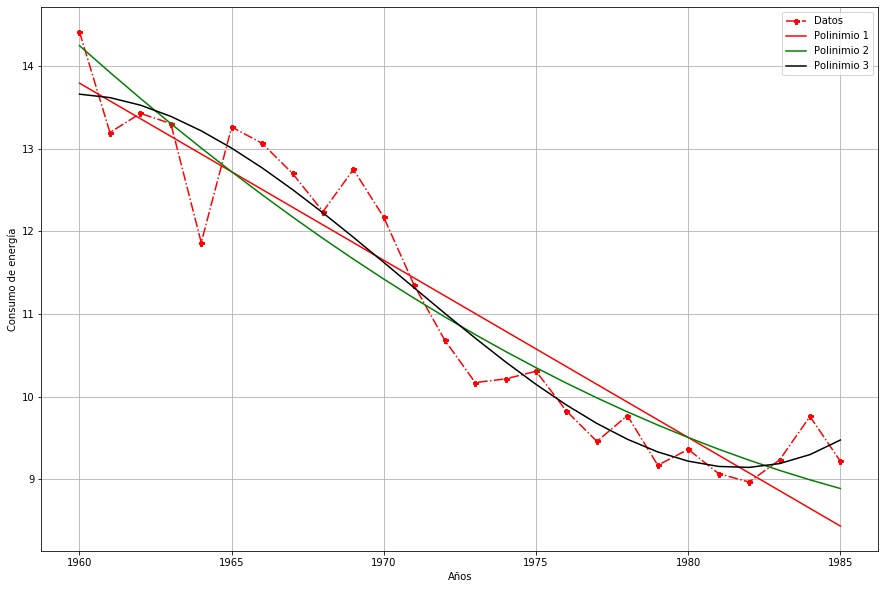

In [25]:
plt.figure(figsize=(15,10))

plt.plot(x_p+1959, y_p, '-.Pr',ms=5,label='Datos')
plt.plot(x_p+1959,yhat1,'r',ms=5,label='Polinimio 1')
plt.plot(x_p+1959,yhat2,'g',ms=5,label='Polinimio 2')
plt.plot(x_p+1959,yhat3,'k',ms=5,label='Polinimio 3')


plt.ylabel('Consumo de energía')
plt.xlabel('Años')
plt.legend(loc='best')
plt.grid()
plt.show()



Text(0, 0.5, 'error')

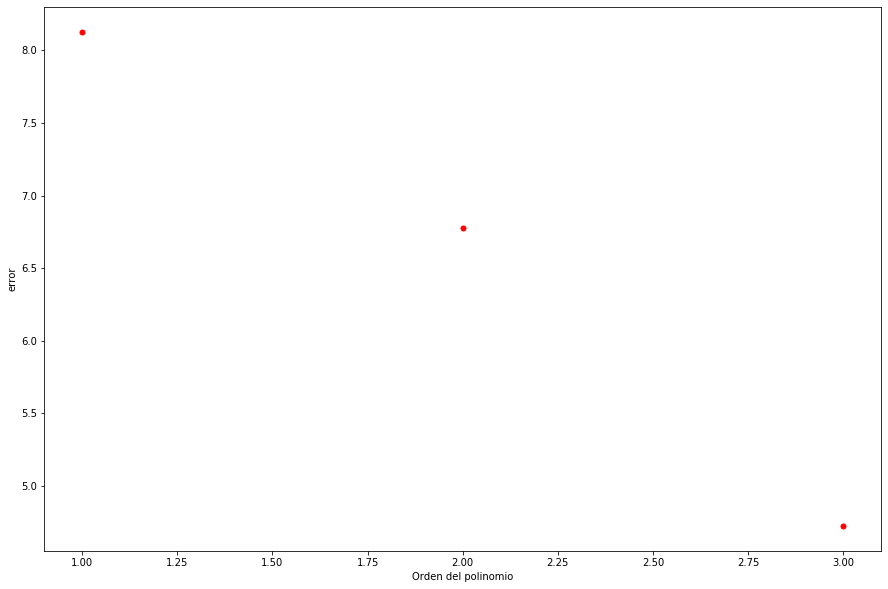

In [26]:
e = [sol1.fun, sol2.fun, sol3.fun]
plt.figure(figsize=(15,10))
plt.plot(range(1,4), e, 'ro', ms=5)
plt.xlabel('Orden del polinomio')
plt.ylabel('error')

**Punto 3 (10 puntos).** Con los polinomios ajustados en el punto anterior, estime el consumo en el año 2015 y compare con el dato real $9.215\%$.

¿Cuál polinomio estima mejor este dato? ¿Es el polinomio que mejor se ajusta? Concluya.

**Solución punto 3.**

In [27]:
yhat1[25],yhat2[25],yhat3[25],data.iloc[25,2]

(8.431566034100046, 8.886047939816242, 9.473497354377017, 9.215213455)

## <font color=green>El polinomio que mejor se ajusta es el de orden 3, aunque los datos estan muy variados, por lo que suponemos que necesitaremos un polinomio de grado mayor para poder alcanzar más precisión.